In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wwbi_country = pd.read_csv('../data/wwbi_country.csv')
wwbi_data = pd.read_csv('../data/wwbi_data.csv')
wwbi_series = pd.read_csv('../data/wwbi_series.csv')

# Data overview

## All data

In [138]:
wwbi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141985 entries, 0 to 141984
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country_code    141985 non-null  object 
 1   indicator_code  141985 non-null  object 
 2   year            141985 non-null  int64  
 3   value           141985 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.3+ MB


In [139]:
wwbi_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   country_code                                       202 non-null    object 
 1   short_name                                         202 non-null    object 
 2   table_name                                         201 non-null    object 
 3   long_name                                          201 non-null    object 
 4   x2_alpha_code                                      199 non-null    object 
 5   currency_unit                                      201 non-null    object 
 6   special_notes                                      88 non-null     object 
 7   region                                             200 non-null    object 
 8   income_group                                       199 non-null    object 
 9   wb_2_code 

In [140]:
wwbi_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   indicator_code  302 non-null    object
 1   indicator_name  302 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


## Vietnam data

In [3]:
# Vietnam data
wwbi_data_vietnam = wwbi_data[wwbi_data['country_code'] == 'VNM']
wwbi_data_vietnam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 137957 to 138832
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_code    876 non-null    object 
 1   indicator_code  876 non-null    object 
 2   year            876 non-null    int64  
 3   value           876 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 34.2+ KB


In [4]:
wwbi_data_vietnam.describe()

,year,value
count,876.000000,8.760000e+02
mean,2010.583333,6.128471e+03
std,3.047981,5.927442e+04
min,2007.000000,-1.652162e-01
25%,2008.000000,2.291202e-01
50%,2010.000000,5.407244e-01
75%,2012.000000,1.341991e+00
max,2019.000000,1.100737e+06


In [5]:
wwbi_data_vietnam

,country_code,indicator_code,year,value
137957,VNM,BI.EMP.PWRK.CA.PB.ZS,2008,0.192340
137958,VNM,BI.EMP.PWRK.CA.PB.ZS,2009,0.217028
137959,VNM,BI.EMP.PWRK.CA.PB.ZS,2010,0.189335
137960,VNM,BI.EMP.TOTL.CA.PB.ZS,2008,0.192306
137961,VNM,BI.EMP.TOTL.CA.PB.ZS,2009,0.216511
...,...,...,...,...
138828,VNM,BI.WAG.TOTL.PB.ZS,2015,20.000008
138829,VNM,BI.WAG.TOTL.PB.ZS,2016,33.233761
138830,VNM,BI.WAG.TOTL.PB.ZS,2017,30.030022
138831,VNM,BI.WAG.TOTL.PB.ZS,2018,34.423294


# Question 1: % GDP as public wage

## 1. wwbi_series

In [144]:
print(wwbi_series[wwbi_series['indicator_code'] == 'BI.WAG.TOTL.GD.ZS'])


        indicator_code                    indicator_name
300  BI.WAG.TOTL.GD.ZS  Wage bill as a percentage of GDP


**Fundamental knowledge**
- The wage bill is defined as the total compensation (in cash or in-kind) payable to a government employee in exchange for work. Wage bill includes wages and salaries, allowances, and social security contributions made on behalf of employees to social insurance schemes (WWBI Codebook (data/WWBI-Codebook-v3.1.pdf))
- The `Wage bill as a percentage of GDP` measures the size of the public sector wage bill (i.e., total government salary expenditure) relative to the entire economy's output.
- What it tells us:
    - Macroeconomic perspective: How much of a country’s economic resources are going into paying public employees -> Provide insights for the significance of public sector in the economy, show the government's role as a major employer. 
    - Economic efficiency: A very high ratio may suggest an oversized or inefficient public sector that could crowd out private sector activity. A disproportionately high wage bill can crowd out private sector investment. Research indicates that a 1% reduction in the public wage bill can lead to an immediate 0.51 percentage point increase in the investment-to-GDP ratio, suggesting that excessive public wage expenditures might deter private investment.
    - Benchmarking across countries: Helps compare how labor-intensive the public sector is in different economies, reflecting differing governmental roles and structures. 
    - Observing over time: An increasing wage bill relative to GDP can strain public finances, leading to higher deficits or necessitating cuts in other essential services. For example, Mali's wage bill surged from 4.4% of GDP in 2010 to 7.9% in 2022, placing it above regional averages and raising fiscal concerns

- Some references:
    1. [The public sector wage bill in the euro area - European Central Bank (ECB)](https://www.ecb.europa.eu/pub/pdf/scpops/ecbop176.en.pdf)

    2. [Mali: Selected Issues – The Public Sector Wage Bill in Mali: Evolution, Regional Comparison, and Reform Options - International Monetary Fund (IMF)](https://www.elibrary.imf.org/view/journals/002/2023/210/article-A003-en.xml)

    3. [Wage Bill and Employment Diagnostic: Key Drivers and Policy Options - World Bank](https://documents1.worldbank.org/curated/en/099320012152224196/pdf/P17870707ee3d60d0b5460a16a39379461.pdf)

    4. [How Government Spending Slows Growth - National Bureau of Economic Research (NBER)](https://www.nber.org/digest/jan00/how-government-spending-slows-growth)

    5. [Can Public Sector Wage Bills Be Reduced? -  National Bureau of Economic Research (NBER)](https://www.nber.org/system/files/working_papers/w17881/w17881.pdf)

## 2. wwbi_country

In [145]:
# neccessary columns
wwbi_country_wage = wwbi_country[['country_code', 'short_name', 'region', 'income_group']]
wwbi_country_wage

,country_code,short_name,region,income_group
0,ABW,Aruba,Latin America & Caribbean,High income
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Lower middle income
3,AIA,Anguilla,NaN,NaN
4,ALB,Albania,Europe & Central Asia,Upper middle income
...,...,...,...,...
197,XKX,Kosovo,Europe & Central Asia,Upper middle income
198,YEM,Yemen,Middle East & North Africa,Low income
199,ZAF,South Africa,Sub-Saharan Africa,Upper middle income
200,ZMB,Zambia,Sub-Saharan Africa,Low income


In [146]:
# Num of unique countries
print(f"Num of unique countries: {wwbi_country_wage['country_code'].nunique()}")

Num of unique countries: 202


In [147]:
print(f"Number of unique regions: {wwbi_country_wage['region'].nunique()}")
print(wwbi_country_wage['region'].value_counts(dropna=False))

print("Countries without region:")
print(wwbi_country_wage[wwbi_country_wage['region'].isnull()])

Number of unique regions: 7
region
Europe & Central Asia         50
Sub-Saharan Africa            48
Latin America & Caribbean     38
East Asia & Pacific           32
Middle East & North Africa    21
South Asia                     8
North America                  3
NaN                            2
Name: count, dtype: int64
Countries without region:
    country_code  short_name region income_group
3            AIA    Anguilla    NaN          NaN
124          MSR  Montserrat    NaN          NaN


In [148]:
print(f"\nNumber of unique income groups: {wwbi_country_wage['income_group'].nunique()}")
print(wwbi_country_wage['income_group'].value_counts(dropna=False))
print("Countries without income group:")
print(wwbi_country_wage[wwbi_country_wage['income_group'].isnull()])


Number of unique income groups: 4
income_group
High income            66
Lower middle income    54
Upper middle income    52
Low income             27
NaN                     3
Name: count, dtype: int64
Countries without income group:
    country_code  short_name                     region income_group
3            AIA    Anguilla                        NaN          NaN
124          MSR  Montserrat                        NaN          NaN
193          VEN   Venezuela  Latin America & Caribbean          NaN


In [149]:
print("\nCross-tabulation of regions and income groups:")
region_income_cross = pd.crosstab(wwbi_country_wage['region'], wwbi_country_wage['income_group'])
region_income_cross


Cross-tabulation of regions and income groups:


income_group,High income,Low income,Lower middle income,Upper middle income
region,,,,
East Asia & Pacific,10,0,14,8
Europe & Central Asia,30,0,4,16
Latin America & Caribbean,14,0,5,18
Middle East & North Africa,8,2,8,3
North America,3,0,0,0
South Asia,0,1,6,1
Sub-Saharan Africa,1,24,17,6


**Insights**

- There are 7 regions: ['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia', 'Middle East & North Africa', 'East Asia & Pacific', 'North America'] with 2 countries missing region: Anguilla, Montserrat
- There are 4 income groups: ['High income', 'Low income', 'Lower middle income', 'Upper middle income'] with 3 countries missing income group: Anguilla, Montserrat, Venezuela

    => Handle missing strategy: drop 3 countries

## 3. wwbi_data

In [150]:
wwbi_data_wage = wwbi_data[wwbi_data['indicator_code'] == 'BI.WAG.TOTL.GD.ZS']
wwbi_data_wage

,country_code,indicator_code,year,value
201,AFG,BI.WAG.TOTL.GD.ZS,2003,6.321759
202,AFG,BI.WAG.TOTL.GD.ZS,2004,7.283608
203,AFG,BI.WAG.TOTL.GD.ZS,2005,6.611046
204,AFG,BI.WAG.TOTL.GD.ZS,2006,7.071940
205,AFG,BI.WAG.TOTL.GD.ZS,2007,7.360051
...,...,...,...,...
141964,ZWE,BI.WAG.TOTL.GD.ZS,2016,13.232838
141965,ZWE,BI.WAG.TOTL.GD.ZS,2017,10.853515
141966,ZWE,BI.WAG.TOTL.GD.ZS,2018,7.866549
141967,ZWE,BI.WAG.TOTL.GD.ZS,2019,3.749973


In [151]:
print(f"Num of unique countries in wage data: {wwbi_data_wage['country_code'].nunique()}") 
# -> different from country data, not all countries has data

Num of unique countries in wage data: 185


In [152]:
missing_values = wwbi_data_wage['value'].isna().sum()
print(f"Missing values in 'value' column: {missing_values}")
# -> no need to handle missing values

Missing values in 'value' column: 0


In [153]:
unique_years = wwbi_data_wage['year'].nunique()
print(f"Number of unique years: {unique_years}")
print(f"List of all years in dataset: {sorted([int(year) for year in wwbi_data_wage['year'].unique()])}")

Number of unique years: 21
List of all years in dataset: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [154]:
years_per_country = wwbi_data_wage.groupby('country_code')['year'].nunique().reset_index()
years_per_country.columns = ['country_code', 'num_years_available']
years_per_country = years_per_country.sort_values('num_years_available', ascending=False)
years_per_country

,country_code,num_years_available
0,ABW,21
120,NER,21
107,MHL,21
109,MLI,21
110,MLT,21
...,...,...
133,PNG,9
108,MKD,8
147,SOM,8
177,VNM,5


In [155]:
print(f"Total countries: {len(years_per_country)}")
print(f"Mean years available: {years_per_country['num_years_available'].mean():.1f}")
print(f"Median years available: {years_per_country['num_years_available'].median():.1f}")
print(f"Min years available: {years_per_country['num_years_available'].min()}")
print(f"Max years available: {years_per_country['num_years_available'].max()}")
countries_all_years = years_per_country[years_per_country['num_years_available'] == unique_years]
print(f"Countries with data for all years: {len(countries_all_years)}")

Total countries: 185
Mean years available: 19.8
Median years available: 21.0
Min years available: 4
Max years available: 21
Countries with data for all years: 144


**Insights**
- There exists 41 countries do not have data for all years from 2000-2020. Mean availability is 19.8 years, relatively high -> good
- Maybe consider dropping countries with <10 years, but need to inspect more with combination of income group and regions


## Merge data

In [156]:
# Drop country with missing regions and income groups in wwbi_country_wage
wwbi_country_wage = wwbi_country_wage.dropna(subset=['region', 'income_group'])
wwbi_country_wage

,country_code,short_name,region,income_group
0,ABW,Aruba,Latin America & Caribbean,High income
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Lower middle income
4,ALB,Albania,Europe & Central Asia,Upper middle income
5,ARE,United Arab Emirates,Middle East & North Africa,High income
...,...,...,...,...
197,XKX,Kosovo,Europe & Central Asia,Upper middle income
198,YEM,Yemen,Middle East & North Africa,Low income
199,ZAF,South Africa,Sub-Saharan Africa,Upper middle income
200,ZMB,Zambia,Sub-Saharan Africa,Low income


In [157]:
# Merge wwbi_country_wage and wwbi_data_wage by country_code
wwbi_merged = pd.merge(wwbi_country_wage, wwbi_data_wage, on='country_code', how='inner')
wwbi_merged

,country_code,short_name,region,income_group,indicator_code,year,value
0,ABW,Aruba,Latin America & Caribbean,High income,BI.WAG.TOTL.GD.ZS,2000,8.503107
1,ABW,Aruba,Latin America & Caribbean,High income,BI.WAG.TOTL.GD.ZS,2001,8.230285
2,ABW,Aruba,Latin America & Caribbean,High income,BI.WAG.TOTL.GD.ZS,2002,9.330809
3,ABW,Aruba,Latin America & Caribbean,High income,BI.WAG.TOTL.GD.ZS,2003,9.070884
4,ABW,Aruba,Latin America & Caribbean,High income,BI.WAG.TOTL.GD.ZS,2004,10.991002
...,...,...,...,...,...,...,...
3630,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,BI.WAG.TOTL.GD.ZS,2016,13.232838
3631,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,BI.WAG.TOTL.GD.ZS,2017,10.853515
3632,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,BI.WAG.TOTL.GD.ZS,2018,7.866549
3633,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,BI.WAG.TOTL.GD.ZS,2019,3.749973


In [158]:
print(f"Number of unique regions: {wwbi_country_wage['region'].nunique()}")
print(wwbi_country_wage['region'].value_counts(dropna=False))
print("\nCross-tabulation of regions and year:")
region_year_cross = pd.crosstab(wwbi_merged['region'], wwbi_merged['year'])
# sort by region alphabetically
region_year_cross = region_year_cross.reindex(sorted(region_year_cross.index), axis=0)
region_year_cross

Number of unique regions: 7
region
Europe & Central Asia         50
Sub-Saharan Africa            48
Latin America & Caribbean     37
East Asia & Pacific           32
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: count, dtype: int64

Cross-tabulation of regions and year:


year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,15,17,19,19,19,21,21,21,24,25,...,26,27,27,27,28,28,28,28,26,21
Europe & Central Asia,39,39,44,46,46,46,46,46,47,47,...,47,47,48,48,48,49,49,49,49,47
Latin America & Caribbean,29,30,30,31,31,31,31,31,32,32,...,32,32,32,32,32,32,32,32,32,31
Middle East & North Africa,18,18,19,19,20,20,20,20,20,20,...,19,19,19,19,18,18,18,18,18,18
North America,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
South Asia,4,4,4,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Sub-Saharan Africa,42,42,44,44,45,46,46,46,46,46,...,47,47,48,48,48,48,48,48,48,46


In [159]:
print(f"\nNumber of unique income groups: {wwbi_country_wage['income_group'].nunique()}")
print(wwbi_country_wage['income_group'].value_counts(dropna=False))
print("\nCross-tabulation of income group and years:")
income_year_cross = pd.crosstab(wwbi_merged['income_group'], wwbi_merged['year'])
income_year_cross


Number of unique income groups: 4
income_group
High income            66
Lower middle income    54
Upper middle income    52
Low income             27
Name: count, dtype: int64

Cross-tabulation of income group and years:


year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
income_group,,,,,,,,,,,,,,,,,,,,,
High income,51,53,57,57,57,56,56,56,57,58,...,58,58,58,58,58,58,58,58,56,52
Low income,23,23,24,25,25,25,25,25,25,25,...,25,25,26,26,26,26,26,26,26,26
Lower middle income,37,37,40,40,41,43,43,43,45,45,...,46,47,47,47,48,49,49,49,49,45
Upper middle income,38,39,41,44,45,47,47,47,49,49,...,49,49,50,50,49,49,49,49,49,46


**Insights:**
- First we dropped countries with unknown regions or income group
- It seems that we should not drop country that does not have data for all 21 years. As for region like North Americe, there are only 3 countries, but seems that 1 country does not have data for all 21 years (>10 years missing). Similar for South Asia, only 8 countries but about 3-4 of them miss data for more than 10 years. 
    -> Maybe strategy now is just plot for all the available data, at least it can provide some insights. If dropping those countries, can significantly reduce the representation of these regions

# Question 2

- Females as a share of public paid employees by occupation: senior officials/ professionals/technicians/ clerks/ elementary occupations workers in public/private sector: Calculate by (Number of female public paid employees who work as senior official/ professionals/ technicians/clerks, Elementary occupations workers) divide by (Number of public paid employees work senior official/professionals/technicians/clerks, Elementary occupations worker)
- 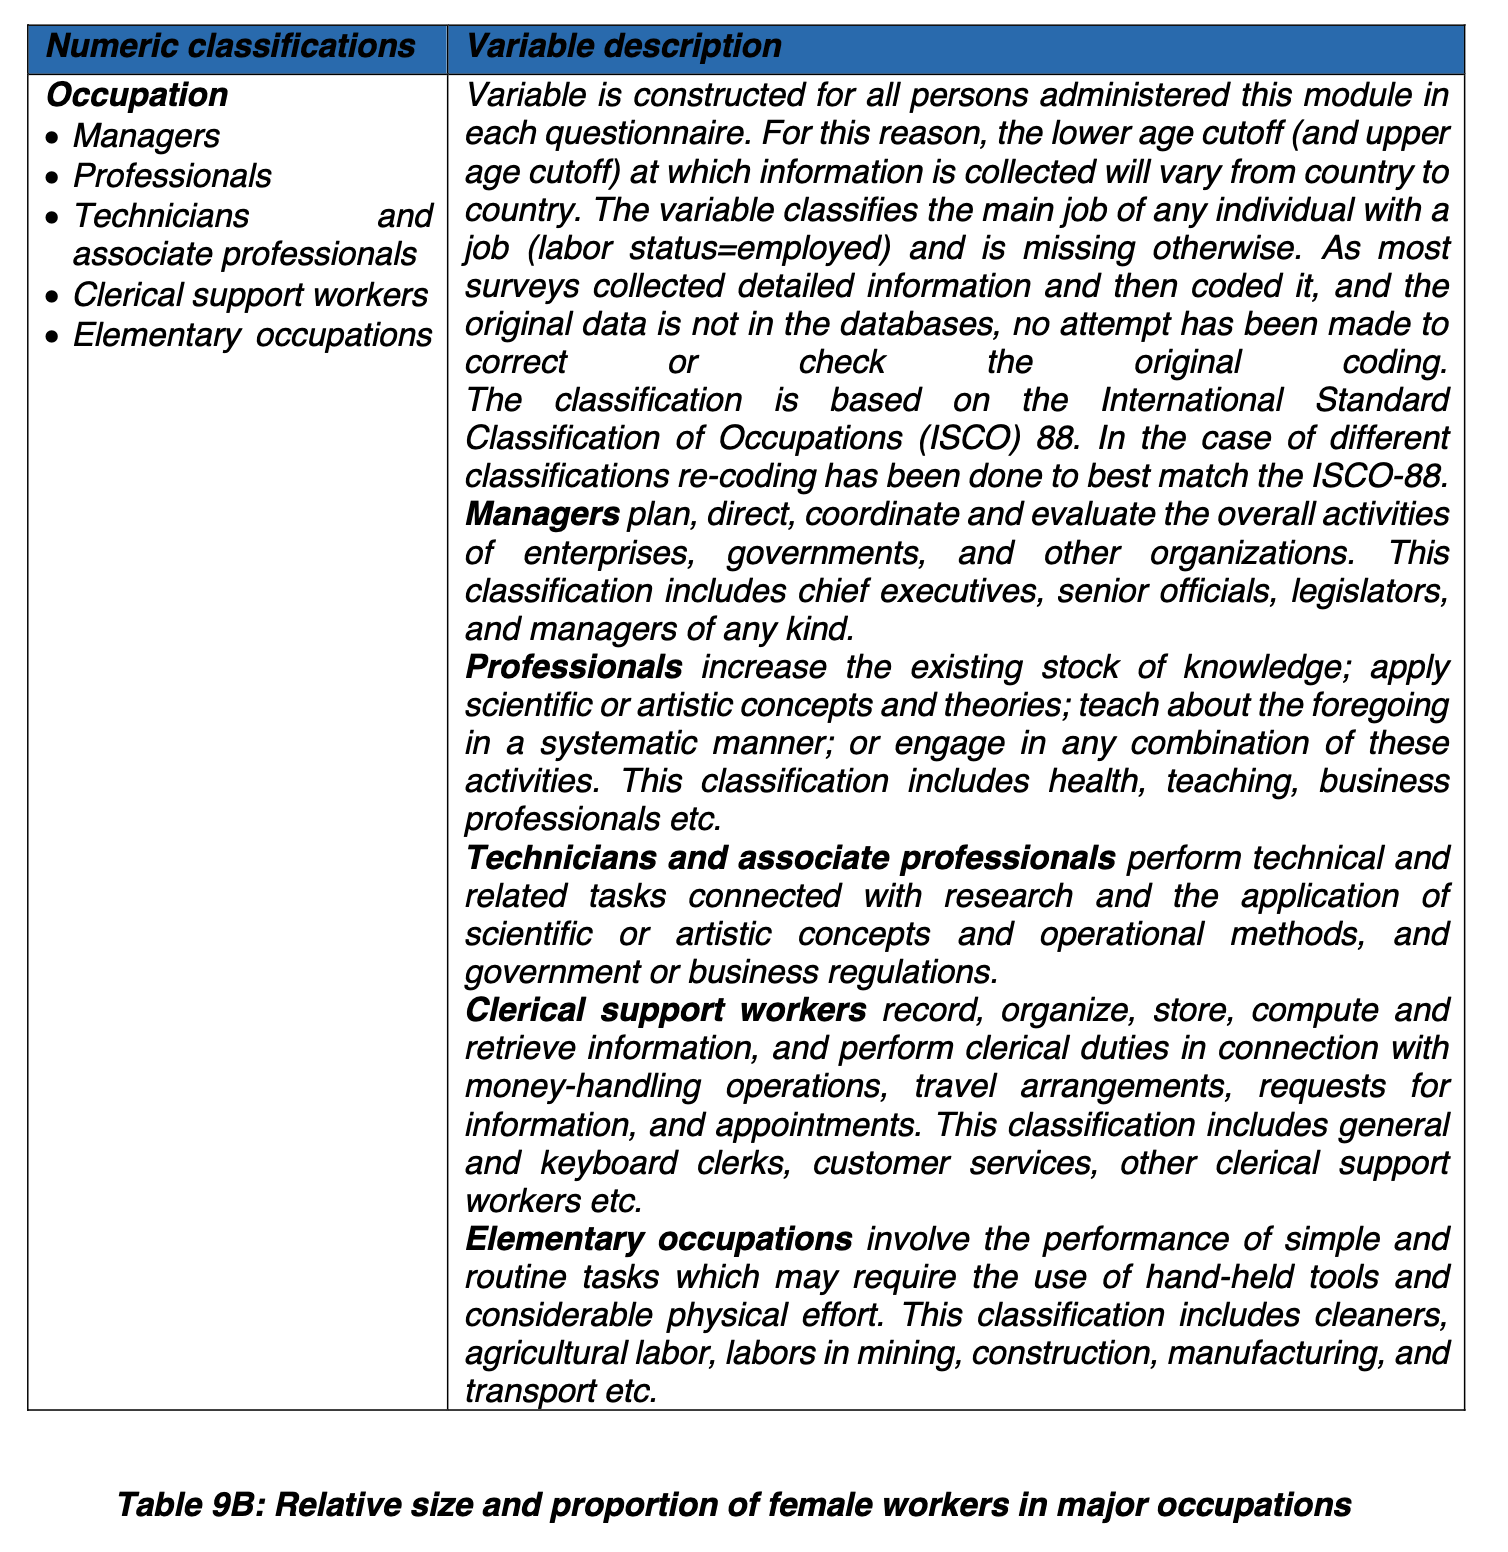

In [45]:
# Public sector indicators
wwbi_data_vietnam_pubs_sn = wwbi_data_vietnam[wwbi_data_vietnam['indicator_code']=='BI.PWK.PUBS.SN.FE.ZS']
wwbi_data_vietnam_pubs_pn = wwbi_data_vietnam[wwbi_data_vietnam['indicator_code']=='BI.PWK.PUBS.PN.FE.ZS']
wwbi_data_vietnam_pubs_tn = wwbi_data_vietnam[wwbi_data_vietnam['indicator_code']=='BI.PWK.PUBS.TN.FE.ZS']
wwbi_data_vietnam_pubs_ck = wwbi_data_vietnam[wwbi_data_vietnam['indicator_code']=='BI.PWK.PUBS.CK.FE.ZS']
wwbi_data_vietnam_pubs_eo = wwbi_data_vietnam[wwbi_data_vietnam['indicator_code']=='BI.PWK.PUBS.EO.FE.ZS']

In [46]:
# Private sector indicators
wwbi_data_vietnam_prvt_sn = wwbi_data_vietnam[wwbi_data_vietnam['indicator_code']=='BI.PWK.PRVS.SN.FE.ZS']
wwbi_data_vietnam_prvt_pn = wwbi_data_vietnam[wwbi_data_vietnam['indicator_code']=='BI.PWK.PRVS.PN.FE.ZS']
wwbi_data_vietnam_prvt_tn = wwbi_data_vietnam[wwbi_data_vietnam['indicator_code']=='BI.PWK.PRVS.TN.FE.ZS']
wwbi_data_vietnam_prvt_ck = wwbi_data_vietnam[wwbi_data_vietnam['indicator_code']=='BI.PWK.PRVS.CK.FE.ZS']
wwbi_data_vietnam_prvt_eo = wwbi_data_vietnam[wwbi_data_vietnam['indicator_code']=='BI.PWK.PRVS.EO.FE.ZS']

In [35]:
def explore_data(dataframes_dict):
    """
    Explore basic information about each dataframe in the dictionary
    """
    summary = {}
    
    for name, df in dataframes_dict.items():
        years_range = df['year'].unique()
        avg_value = df['value'].mean()
        min_value = df['value'].min()
        max_value = df['value'].max()
        
        # Store in summary
        summary[name] = {
            'years_available': sorted([int(year) for year in years_range]),
            'year_count': len(years_range),
            'avg_value': avg_value,
            'min_value': min_value,
            'max_value': max_value
        }
    
    return pd.DataFrame(summary).T

dfs = {
    'Public Clerks': wwbi_data_vietnam_pubs_ck,
    'Public Elementary': wwbi_data_vietnam_pubs_eo,
    'Public Managers': wwbi_data_vietnam_pubs_sn,
    'Public Professionals': wwbi_data_vietnam_pubs_pn,
    'Public Technicians': wwbi_data_vietnam_pubs_tn,
    'Private Clerks': wwbi_data_vietnam_prvt_ck,
    'Private Elementary': wwbi_data_vietnam_prvt_eo,
    'Private Managers': wwbi_data_vietnam_prvt_sn,
    'Private Professionals': wwbi_data_vietnam_prvt_pn,
    'Private Technicians': wwbi_data_vietnam_prvt_tn
}

In [36]:
summary_df = explore_data(dfs)
summary_df

,years_available,year_count,avg_value,min_value,max_value
Public Clerks,"[2010, 2012, 2014, 2016]",4,0.532737,0.418343,0.619044
Public Elementary,"[2010, 2012, 2014, 2016]",4,0.558978,0.503617,0.590686
Public Managers,"[2010, 2012, 2014, 2016]",4,0.240993,0.217675,0.273761
Public Professionals,"[2010, 2012, 2014, 2016]",4,0.530725,0.507583,0.549129
Public Technicians,"[2010, 2012, 2014, 2016]",4,0.625762,0.60553,0.65949
Private Clerks,"[2010, 2012, 2014, 2016]",4,0.56769,0.517694,0.642635
Private Elementary,"[2010, 2012, 2014, 2016]",4,0.444218,0.38689,0.517507
Private Managers,"[2010, 2012, 2014, 2016]",4,0.213614,0.183163,0.240541
Private Professionals,"[2010, 2012, 2014, 2016]",4,0.506593,0.431755,0.569501
Private Technicians,"[2010, 2012, 2014, 2016]",4,0.528705,0.500837,0.562839


**Insights**
- Have 5 occupation groups
- Only 4 time points (2010, 2012, 2014, 2016)
- No missing data

Option 1: Bar Plot of All 5 Occupation Groups Over Time 
Use grouped bar plots:
- X-axis: Occupation groups
- Y-axis: % Female
- Bars grouped by: Year 
- Do one for Public and one for Private

Option 2: Line Plot of All 5 Occupation Groups Over Time. One for public, one for private

Option 3: Group into High-Level vs Low-Level 
Grouped Plot of Average % Female Representation (High vs Low level) Over Time. Combined line plot for gap
	- X-axis: High/low grouped by year
	- Y-axis:  % Female representation
	- Lines:
		- High-level average (Managers, Professionals, Technicians)
		- Low-level average (Clerks, Elementary workers)

In [94]:
def integrate_data(dataframes_dict):
    """
    Integrate all dataframes into a single one for easier analysis
    """
    all_data = []
    occupation_order = ['Managers', 'Professionals', 'Technicians', 'Clerks', 'Elementary']

    for name, df in dataframes_dict.items():
        sector = name.split()[0]  # 'Public' or 'Private'
        occupation = ' '.join(name.split()[1:])  # The occupation type
        
        # Create a level category (high or low)
        if occupation in ['Managers', 'Professionals', 'Technicians']:
            level = 'High'
        elif occupation in ['Clerks', 'Elementary']:
            level = 'Low'
        else:
            level = 'Unknown'
        
        # Copy the dataframe to avoid modifying the original
        temp_df = df.copy()
        temp_df['sector'] = sector
        temp_df['occupation'] = occupation
        temp_df['level'] = level
        
        all_data.append(temp_df)
    
    # Concatenate all dataframes
    integrated_df = pd.concat(all_data, ignore_index=True)
    integrated_df['occupation'] = pd.Categorical(
        integrated_df['occupation'],
        categories=occupation_order,
        ordered=True
    )
    return integrated_df

In [95]:
integrated_data = integrate_data(dfs)
integrated_data

,country_code,indicator_code,year,value,sector,occupation,level
0,VNM,BI.PWK.PUBS.CK.FE.ZS,2010,0.418343,Public,Clerks,Low
1,VNM,BI.PWK.PUBS.CK.FE.ZS,2012,0.619044,Public,Clerks,Low
2,VNM,BI.PWK.PUBS.CK.FE.ZS,2014,0.545412,Public,Clerks,Low
3,VNM,BI.PWK.PUBS.CK.FE.ZS,2016,0.548147,Public,Clerks,Low
4,VNM,BI.PWK.PUBS.EO.FE.ZS,2010,0.503617,Public,Elementary,Low
5,VNM,BI.PWK.PUBS.EO.FE.ZS,2012,0.586875,Public,Elementary,Low
6,VNM,BI.PWK.PUBS.EO.FE.ZS,2014,0.554733,Public,Elementary,Low
7,VNM,BI.PWK.PUBS.EO.FE.ZS,2016,0.590686,Public,Elementary,Low
8,VNM,BI.PWK.PUBS.SN.FE.ZS,2010,0.244891,Public,Managers,High
9,VNM,BI.PWK.PUBS.SN.FE.ZS,2012,0.227645,Public,Managers,High


In [96]:
def calculate_representation_gap(integrated_df):
    """
    Calculate the average representation by level, sector, and year
    """
    # Group by sector, level, and year and calculate mean value
    grouped = integrated_df.groupby(['sector', 'level', 'year'])['value'].mean().reset_index()
    
    # Pivot to get high and low levels side by side
    pivoted = grouped.pivot_table(index=['sector', 'year'], columns='level', values='value').reset_index()
    
    # Calculate the gap (high - low)
    pivoted['gap'] = pivoted['High'] - pivoted['Low']
    
    return pivoted

level,sector,year,High,Low,gap
0,Private,2010,0.422059,0.461232,-0.039174
1,Private,2012,0.387265,0.517601,-0.130335
2,Private,2014,0.438058,0.530220,-0.092161
3,Private,2016,0.417834,0.514762,-0.096929
4,Public,2010,0.453408,0.460980,-0.007572
5,Public,2012,0.460247,0.602960,-0.142713
6,Public,2014,0.473512,0.550072,-0.076560
7,Public,2016,0.476140,0.569416,-0.093277
